STEP 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [48]:
import pickle

STEP 2: Load Dataset

In [3]:
data = pd.read_csv("Weather.csv")

In [4]:
data.head()


,Pressure,global_radiation,temp_mean(c),temp_min(c),temp_max(c),Wind_Speed,Wind_Bearing,normalized_label
0,971.5,0.25,9.0,7.0,10.7,0.0,0.0,0.0
1,972.3,0.97,10.5,6.7,13.5,0.0,0.0,0.0
2,972.4,0.74,6.5,3.9,9.1,0.0,0.0,0.0
3,973.2,0.15,5.1,3.7,7.7,0.0,0.0,0.0
4,975.7,0.12,5.2,2.6,8.3,0.0,0.0,0.0


STEP 3: Data Preprocessing

In [51]:
# Dataset structure
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 533300 entries, 0 to 533310
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Pressure          533300 non-null  float64
 1   global_radiation  533300 non-null  float64
 2   temp_mean(c)      533300 non-null  float64
 3   temp_min(c)       533300 non-null  float64
 4   temp_max(c)       533300 non-null  float64
 5   Wind_Speed        533300 non-null  float64
 6   Wind_Bearing      533300 non-null  float64
 7   normalized_label  533300 non-null  float64
dtypes: float64(8)
memory usage: 36.6 MB


In [5]:
data.isnull().sum()

Pressure            5
global_radiation    2
temp_mean(c)        5
temp_min(c)         3
temp_max(c)         1
Wind_Speed          1
Wind_Bearing        1
normalized_label    1
dtype: int64

In [52]:
data.describe()


,Pressure,global_radiation,temp_mean(c),temp_min(c),temp_max(c),Wind_Speed,Wind_Bearing,normalized_label
count,533300.000000,533300.000000,533300.000000,533300.000000,533300.000000,533300.000000,533300.000000,533300.000000
mean,1011.436745,1.310360,12.646170,8.648559,16.872094,11.886072,192.504954,0.906156
std,3.238864,0.897192,6.519234,5.867748,7.692864,7.676915,101.983267,0.992548
min,971.500000,0.030000,-11.100000,-16.000000,-8.500000,0.000000,0.000000,0.000000
25%,1009.800000,0.510000,7.800000,4.500000,11.100000,6.410000,130.000000,0.000000
50%,1012.300000,1.160000,13.200000,9.400000,17.200000,11.040000,190.000000,1.000000
75%,1013.900000,2.010000,17.500000,13.300000,22.400000,15.620000,288.000000,2.000000
max,1015.000000,3.600000,28.600000,22.000000,37.000000,47.530000,359.000000,3.000000


In [6]:
data = data.dropna()

STEP 4: Data Visualization



In [44]:
print(data.columns)

Index(['Pressure', 'global_radiation', 'temp_mean(c)', 'temp_min(c)',
       'temp_max(c)', 'Wind_Speed', 'Wind_Bearing', 'normalized_label'],
      dtype='object')


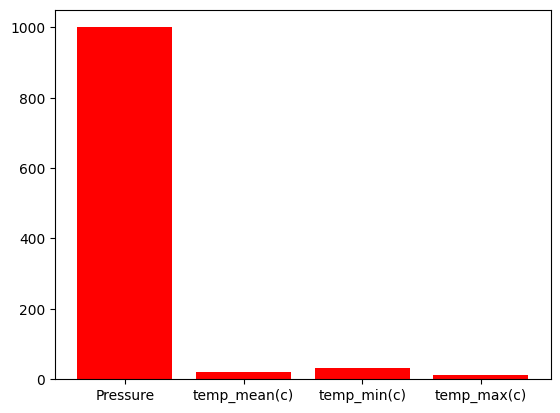

In [26]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["Pressure", "temp_mean(c)", "temp_min(c)", "temp_max(c)"])
y = np.array([1000, 20, 30.22, 10.45])

plt.bar(x, y, color = "red")
plt.show()

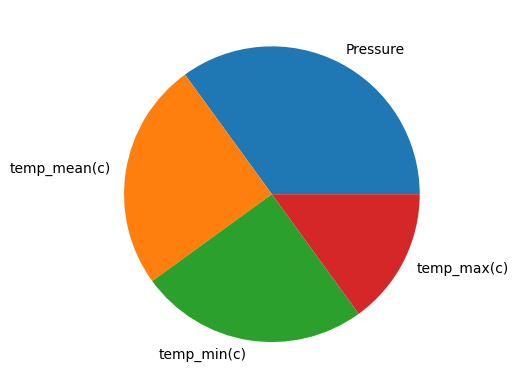

In [22]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([35, 25, 25, 15])
mylabels = ["Pressure", "temp_mean(c)", "temp_min(c)", "temp_max(c)"]

plt.pie(y, labels = mylabels)
plt.show() 

STEP 5: Feature Selection

In [55]:
X = data[
    [
        "Pressure",
        "global_radiation",
        "temp_mean(c)",
        "temp_min(c)",
        "temp_max(c)",
        "Wind_Speed",
        "Wind_Bearing"
    ]
]

y = data["normalized_label"]

X.head(), y.head()


(   Pressure  global_radiation  temp_mean(c)  temp_min(c)  temp_max(c)  \
 0     971.5              0.25           9.0          7.0         10.7   
 1     972.3              0.97          10.5          6.7         13.5   
 2     972.4              0.74           6.5          3.9          9.1   
 3     973.2              0.15           5.1          3.7          7.7   
 4     975.7              0.12           5.2          2.6          8.3   
 
    Wind_Speed  Wind_Bearing  
 0         0.0           0.0  
 1         0.0           0.0  
 2         0.0           0.0  
 3         0.0           0.0  
 4         0.0           0.0  ,
 0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 Name: normalized_label, dtype: float64)

STEP 6: Train Test Split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((426640, 7), (106660, 7))

STEP 7: Model Training & Evaluation

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Linear Regression MAE:", mean_absolute_error(y_test, lr_pred))
print("Linear Regression R2:", r2_score(y_test, lr_pred))


Linear Regression MAE: 0.39904855340506973
Linear Regression R2: 0.6912725810674447


In [39]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("Decision Tree MAE:", mean_absolute_error(y_test, dt_pred))
print("Decision Tree R2:", r2_score(y_test, dt_pred))


Decision Tree MAE: 0.00030892496162659473
Decision Tree R2: 0.9997395530441081


In [50]:
with open("energy_model.pkl", "wb") as file:
    pickle.dump('model', file)

In [59]:
with open("energy_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

print("✅ Model loaded successfully")


✅ Model loaded successfully
